# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

In [3]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential, load_model
from keras.datasets import mnist
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

colors = sns.color_palette("hls", 8)              # Colors
title_size = 16                                   # Size title
axis_size = 14                                    # Size axis label
value_size = 12                                   # Size values on axis
legend_size = 12                                  # Size legend

## Exercise 12.1 
### Assignment

Change at will and train your DNN by increasing the number of epochs to an adeuqate value. Try to use at least two other optimizers, different from SGD: watch to accuracy and loss for training and validation data and comment on the performances.

### Exercise 12.1 - Resolution

I made a DNN with four layers and compiled the model with four different optimizers (`SGD`, `Adam`, `RMSprop` and `Adagrad`) and $N_{epochs} = 40$.

The loss values and the accuracy for `Adam` and `RMSprop` remain almost constant throughout the epochs (it would have been possible to use fewer epochs).
`Adagrad` appears to be the worst model due to its lower accuracy and higher loss values. The other three model have similar accuracy and loss values for the training data. For the test data, `SGD` has the lowest loss value, which differs from the others while `Adam` and `RMSprop` have oscillation that could be attributed to overfitting.

Hence the optimizer with the best performace seems to be `SGD`. However, when testing the models with different digits, only `Adagrad` made a mistake in recognizing one number. The other models recognized all the digits correctly.

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.6392 - loss: 1.1580 - val_acc: 0.9126 - val_loss: 0.3184
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.8779 - loss: 0.4218 - val_acc: 0.9308 - val_loss: 0.2439
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9059 - loss: 0.3296 - val_acc: 0.9414 - val_loss: 0.2049
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9220 - loss: 0.2836 - val_acc: 0.9469 - val_loss: 0.1823
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9288 - loss: 0.2533 - val_acc: 0.9535 - val_loss: 0.1621
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9380 - loss: 0.2230 - val_acc: 0.9569 - val_loss: 0.1475
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.9425 - loss: 0.2056 - val_acc: 0.9601 - val_loss: 0.1332
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.9470 - loss: 0.1876 - val_acc: 0.9616 - val_loss: 0.1255
Epoch 9/40
1875/1875 ━━━━━━━━━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.8615 - loss: 0.4579 - val_acc: 0.9645 - val_loss: 0.1274
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.9587 - loss: 0.1548 - val_acc: 0.9709 - val_loss: 0.1108
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.9690 - loss: 0.1294 - val_acc: 0.9727 - val_loss: 0.1224
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.9729 - loss: 0.1241 - val_acc: 0.9724 - val_loss: 0.1322
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.9737 - loss: 0.1222 - val_acc: 0.9787 - val_loss: 0.1270
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.9744 - loss: 0.1249 - val_acc: 0.9766 - val_loss: 0.1406
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.9754 - loss: 0.1171 - val_acc: 0.9777 - val_loss: 0.1512
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.9772 - loss: 0.1161 - val_acc: 0.9767 - val_loss: 

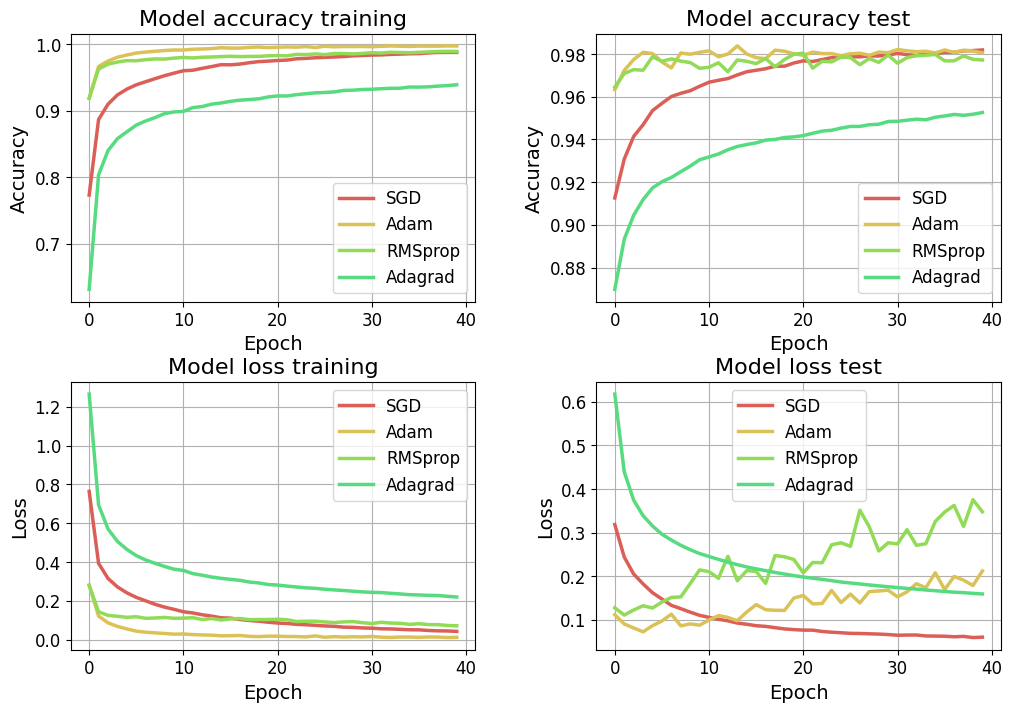

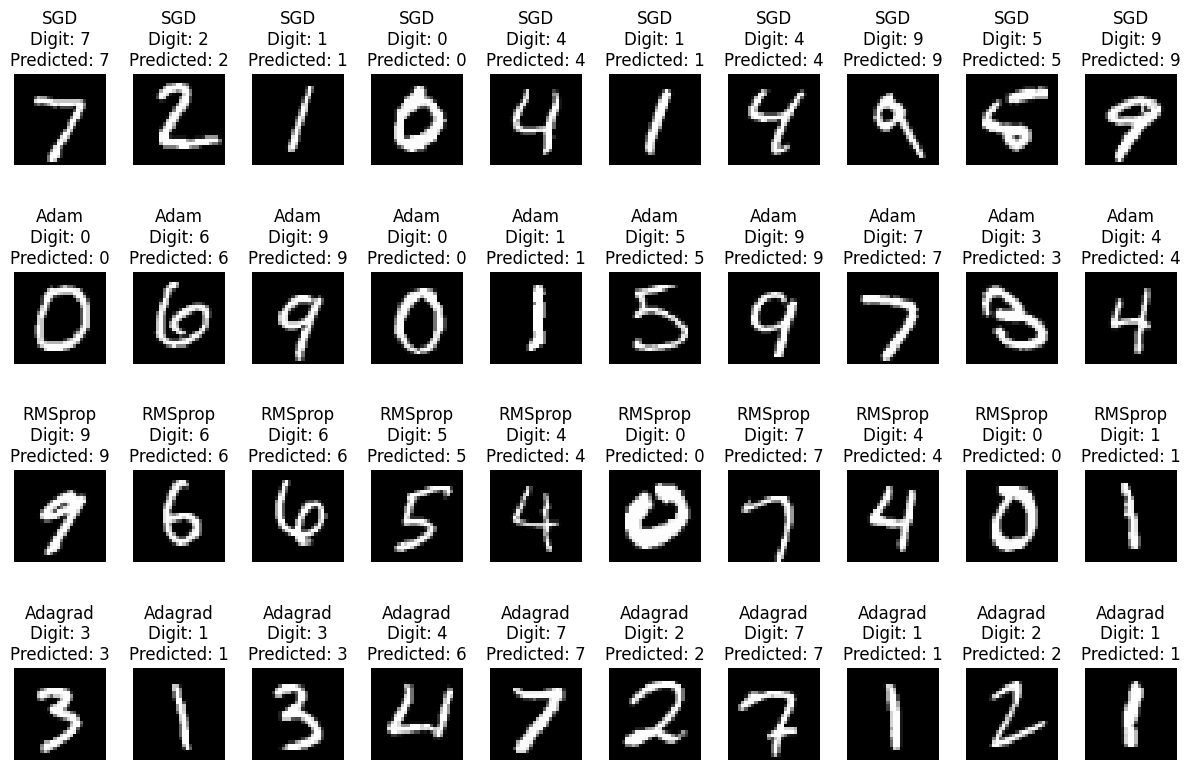

In [2]:
# Define the DNN architecture
def create_DNN():
    model = Sequential()
    model.add(Dense(400, input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Compile the model
def compile_model(i):
    model=create_DNN()   # Create the model
    # Compile the model according to the optimizer passed as argument
    if i == 0:                                                                                 
        model.compile(loss = keras.losses.categorical_crossentropy, optimizer = SGD(), metrics = ['acc'])    
    if i == 1:                                                                                 
        model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(), metrics = ['acc'])
    if i == 2:                                                                                 
        model.compile(loss = keras.losses.categorical_crossentropy, optimizer = RMSprop(), metrics = ['acc']) 
    if i == 3:                                                                               
        model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adagrad(), metrics = ['acc'])
    return model

# Fix random seed
seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)

img_rows, img_cols = 28, 28     # Number of pixels 
num_classes = 10                # 10 digits

# Data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape and rescale data in interval [0,1]
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols).astype('float32') / 255

# Convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

# Training parameters
batch_size = 32
epochs = 40 
optimizer = ['SGD', 'Adam', 'RMSprop', 'Adagrad']  # List of optimizers
predictions = []                                   # List of predictions

plt.figure(figsize=(12, 8))

for i in range(len(optimizer)):                    # Loop over the optimizers
    model_DNN = compile_model(i)                   # Create DNN
    history = model_DNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))    # Train DNN and store training info in history
    score = model_DNN.evaluate(X_test, Y_test, verbose=1)       # Evaluate model

    # Save the model for i == 1 (Adam optimizer)
    if i == 1:
        model_DNN.save('File_12/DNN_model_adam.h5')

    # Plot accuracy train
    plt.subplot(2, 2, 1)
    plt.plot(history.history['acc'], color=colors[i], linewidth=2.5, label=optimizer[i])
    plt.ylabel('Accuracy', fontsize = axis_size)
    plt.xlabel('Epoch', fontsize = axis_size)
    plt.title("Model accuracy training", fontsize = title_size)
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    # Plot accuracy test
    plt.subplot(2, 2, 2)
    plt.plot(history.history['val_acc'], color=colors[i], linewidth=2.5, label=optimizer[i])
    plt.ylabel('Accuracy', fontsize = axis_size)
    plt.xlabel('Epoch', fontsize = axis_size)
    plt.title("Model accuracy test", fontsize = title_size)
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    # Plot loss train
    plt.subplot(2, 2, 3)
    plt.plot(history.history['loss'], color=colors[i], linewidth=2.5, label=optimizer[i])
    plt.ylabel('Loss', fontsize = axis_size)
    plt.xlabel('Epoch', fontsize = axis_size)
    plt.title("Model loss training", fontsize = title_size)
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    # Plot loss test
    plt.subplot(2, 2, 4)
    plt.plot(history.history['val_loss'], color=colors[i], linewidth=2.5, label=optimizer[i])
    plt.ylabel('Loss', fontsize = axis_size)
    plt.xlabel('Epoch', fontsize = axis_size)
    plt.title("Model loss test", fontsize = title_size)
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    predictions.append(model_DNN.predict(X_test))   # Save predictions

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)     # Reshape data

plt.figure(figsize=(15, 20))

for j in range(len(optimizer)):     # Loop over the optimizers
     for i in range(10):            # Loop over the digits
        ax = plt.subplot(2 * len(optimizer), 10, 10 * j + i + 1)    
        plt.imshow(X_test[i + 30, :, :, 0], cmap='gray')        # Plot the digits
        plt.title(optimizer[j]+"\nDigit: {}\nPredicted: {}".format(np.argmax(Y_test[i + 30]), np.argmax(predictions[j][i + 30])))   # Title with predicted and true value
        plt.axis('off') 
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## Exercise 12.2 
### Assignment

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that you should complete.

Train your DCNN and evaluate its performance proceeding exactly as before:

In the end, add the evaluation of your CNN performances like that used for the DNN.

### Resolution


CNNs are characterized by the presence of convolution layers and pooling layers. Convolution layers apply filters to the input layer to obtain features, while pooling layers reduce the spatial size of the features through coarse-grain, keeping the most relevant information.

I created a CNN using `Conv2D`, `MaxPooling2D`, `Dropout`, `Flatten` and `Dense` layers and four different optimizers (`SGD`, `Adam`, `RMSprop` and `Adagrad`).

`Adagrad` appears to be the worst optimizer, while the others have very similar behavior. However, all the models are able to recognize all the digits.

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.3982 - loss: 1.6637 - val_acc: 0.9369 - val_loss: 0.2595
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.7871 - loss: 0.6157 - val_acc: 0.9598 - val_loss: 0.1438
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.8361 - loss: 0.4753 - val_acc: 0.9603 - val_loss: 0.1318
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.8567 - loss: 0.4147 - val_acc: 0.9708 - val_loss: 0.0976
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.8714 - loss: 0.3736 - val_acc: 0.9747 - val_loss: 0.0824
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - acc: 0.8794 - loss: 0.3453 - val_acc: 0.9772 - val_loss: 0.0738
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - acc: 0.8858 - loss: 0.3261 - val_acc: 0.9768 - val_loss: 0.0759
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - acc: 0.8868 - loss: 0.3146 - val_acc: 0.9803 - val_loss: 0.0673
Epoch 9/20
1875/1875 ━━━━━━━━━━━

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.6697 - loss: 0.9492 - val_acc: 0.9758 - val_loss: 0.0814
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - acc: 0.8951 - loss: 0.3155 - val_acc: 0.9812 - val_loss: 0.0621
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - acc: 0.9102 - loss: 0.2607 - val_acc: 0.9826 - val_loss: 0.0544
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9155 - loss: 0.2420 - val_acc: 0.9865 - val_loss: 0.0493
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - acc: 0.9176 - loss: 0.2394 - val_acc: 0.9837 - val_loss: 0.0583
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - acc: 0.9177 - loss: 0.2443 - val_acc: 0.9827 - val_loss: 0.0607
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - acc: 0.9201 - loss: 0.2487 - val_acc: 0.9822 - val_loss: 0.0601
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - acc: 0.9179 - loss: 0.2567 - val_acc: 0.9844 - val_loss

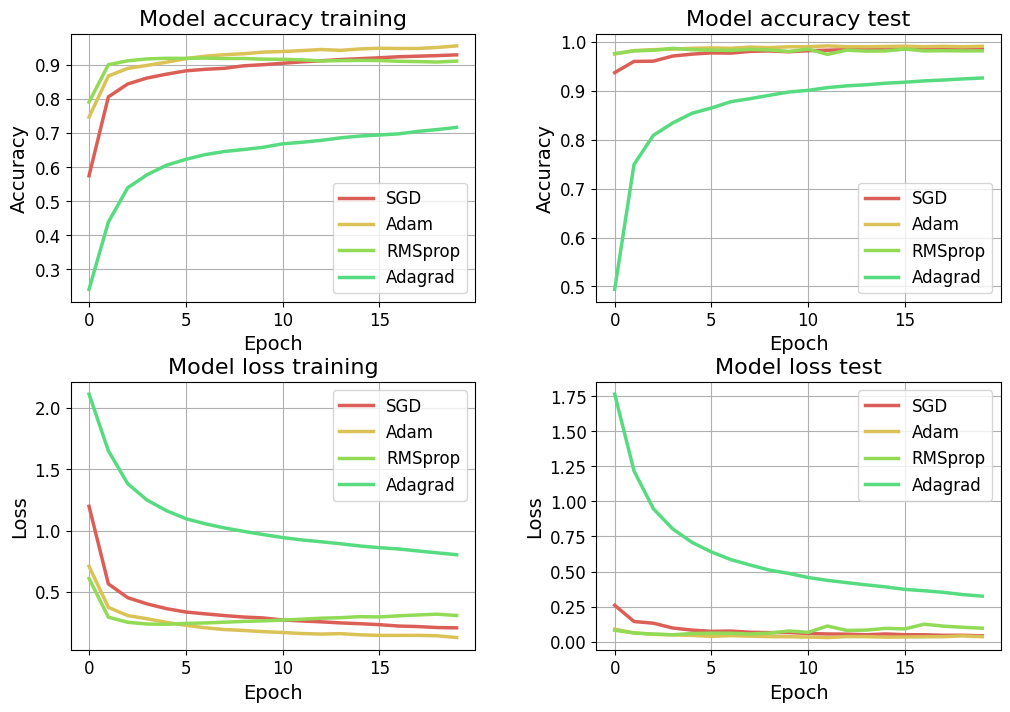

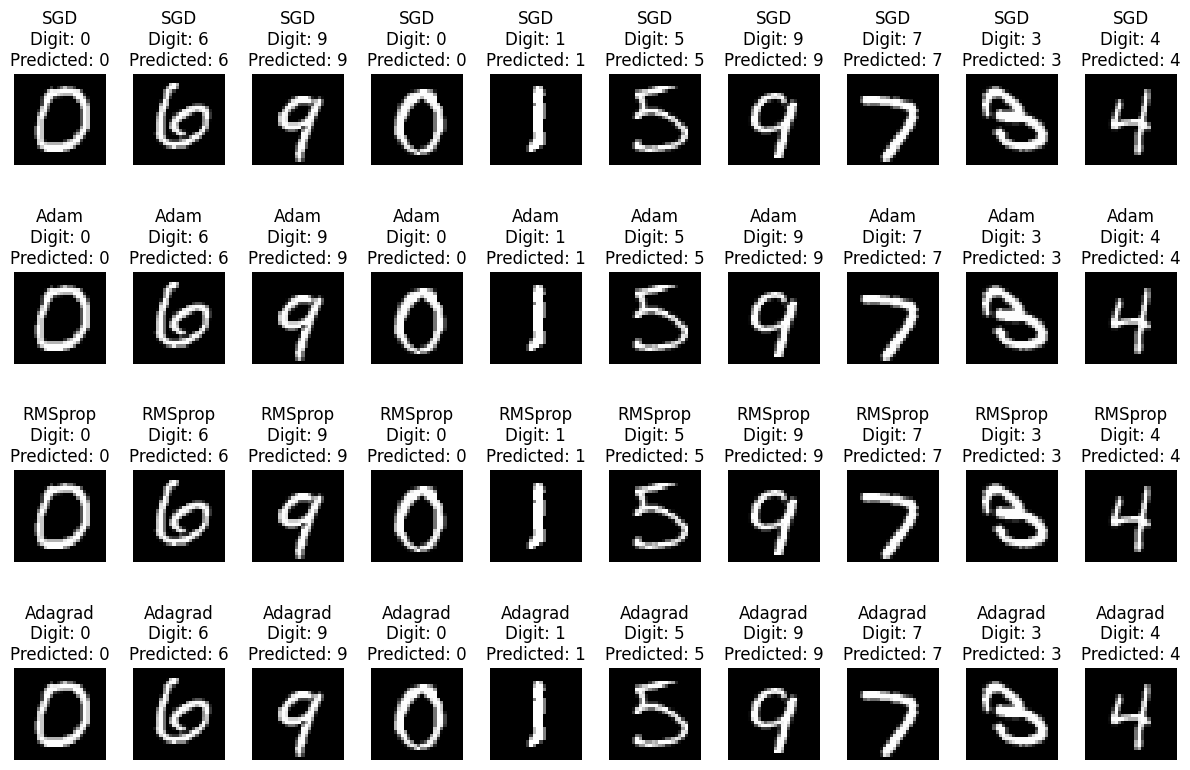

In [25]:
# Define the CNN architecture
def create_CNN(i):
    # CNN model
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(24, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(24, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # Compile the model according to the optimizer passed as argument
    if i == 0:                                                                                 
        model.compile(loss = keras.losses.categorical_crossentropy, optimizer = SGD(), metrics = ['acc'])    
    if i == 1:                                                                                 
        model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(), metrics = ['acc'])
    if i == 2:                                                                                 
        model.compile(loss = keras.losses.categorical_crossentropy, optimizer = RMSprop(), metrics = ['acc']) 
    if i == 3:                                                                               
        model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adagrad(), metrics = ['acc'])
    return model

# Fix random seed
seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)

img_rows, img_cols = 28, 28     # Number of pixels 
num_classes = 10                # 10 digits

# Data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape and rescale data in interval [0,1]
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
input_shape = (img_rows, img_cols, 1)

# Training parameters
batch_size = 32
epochs = 20 
optimizer = ['SGD', 'Adam', 'RMSprop', 'Adagrad']   # List of optimizers
predictions = []                                    # List of predictions

plt.figure(figsize=(12, 8))

for i in range(len(optimizer)):     # Loop over the optimizers
    model_CNN = create_CNN(i)                                                                                                       # Create the deep neural net
    history = model_CNN.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, Y_test))    # Train DNN and store training info in history
    score = model_CNN.evaluate(X_test, Y_test, verbose=1)                                                                           # Evaluate model

    # Save the model for i == 1 (Adam optimizer)
    if i == 1:
        model_CNN.save('File_12/CNN_model_adam.h5')

    # Plot accuracy train
    plt.subplot(2, 2, 1)
    plt.plot(history.history['acc'], color=colors[i], linewidth=2.5, label=optimizer[i])
    plt.ylabel('Accuracy', fontsize = axis_size)
    plt.xlabel('Epoch', fontsize = axis_size)
    plt.title("Model accuracy training", fontsize = title_size)
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    # Plot accuracy test
    plt.subplot(2, 2, 2)
    plt.plot(history.history['val_acc'], color=colors[i], linewidth=2.5, label=optimizer[i])
    plt.ylabel('Accuracy', fontsize = axis_size)
    plt.xlabel('Epoch', fontsize = axis_size)
    plt.title("Model accuracy test", fontsize = title_size)
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    # Plot loss train
    plt.subplot(2, 2, 3)
    plt.plot(history.history['loss'], color=colors[i], linewidth=2.5, label=optimizer[i])
    plt.ylabel('Loss', fontsize = axis_size)
    plt.xlabel('Epoch', fontsize = axis_size)
    plt.title("Model loss training", fontsize = title_size)
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    # Plot loss test
    plt.subplot(2, 2, 4)
    plt.plot(history.history['val_loss'], color=colors[i], linewidth=2.5, label=optimizer[i])
    plt.ylabel('Loss', fontsize = axis_size)
    plt.xlabel('Epoch', fontsize = axis_size)
    plt.title("Model loss test", fontsize = title_size)
    plt.legend(fontsize = legend_size)
    plt.tick_params(axis='both', which='major', labelsize=value_size)
    plt.grid(True)

    predictions.append(model_CNN.predict(X_test))

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)     # Reshape data

plt.figure(figsize=(15, 20))

for j in range(len(optimizer)):     # Loop over the optimizers
     for i in range(10):            # Loop over the digits
        ax = plt.subplot(2 * len(optimizer), 10, 10 * j + i + 1)    
        plt.imshow(X_test[10 + i, :, :, 0], cmap='gray')        # Plot the digits
        plt.title(optimizer[j]+"\nDigit: {}\nPredicted: {}".format(np.argmax(Y_test[10 + i]), np.argmax(predictions[j][10 + i])))   # Title with predicted and true value
        plt.axis('off') 
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## Exercise 12.3 
### Assignment

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

### Resolution

I used `gimp` to create "handwritten" digits with different dimensions and orientations. I then used the DNN and CNN models with `Adam` optimizer that I created in previous exercises to recognize them. The CNN was able to recognize all the digits, while the DNN failed to recognize five digits. As expected, CNN is more efficient in recognizing digits, thanks to its capacity to deal with locality and translational invariance.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


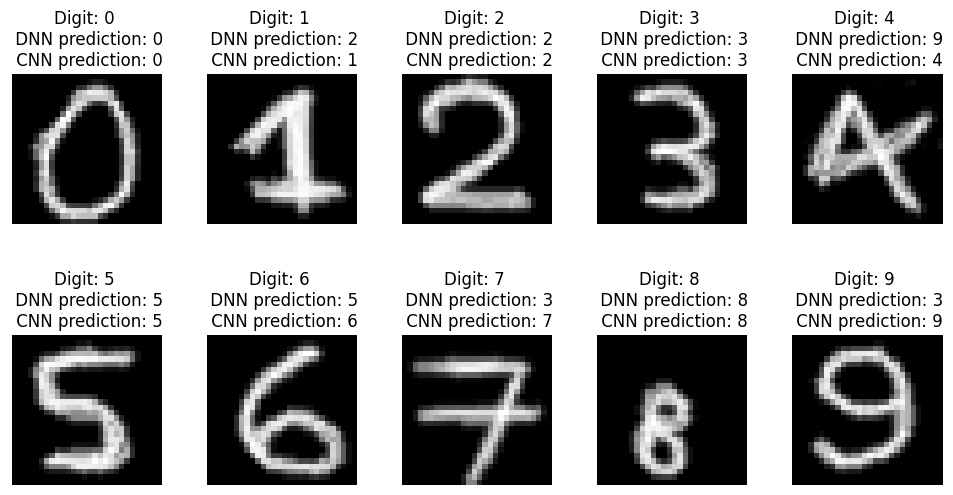

In [32]:
# Load model for DNN and CNN with Adam optimizer
model_CNN = load_model('File_12/CNN_model_adam.h5')
model_DNN = load_model('File_12/DNN_model_adam.h5')

plt.figure(figsize=(12, 6))

for i in range(10):   # Loop over pictures
    # Load picture
    digit_filename = f"Pictures/picture_{i}.png"
    digit_in = Image.open(digit_filename).convert('L')

    # Convert picture to data
    ydim, xdim = digit_in.size
    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for k in range(xdim):
            data[k,j]=pix[j,k]
    data /= 255

    # Prediction
    data_DNN = data.reshape(1, xdim * ydim) 
    data_CNN = data.reshape(1, xdim, ydim, 1)  
    pred_DNN = model_DNN.predict(data_DNN)
    pred_CNN = model_CNN.predict(data_CNN)

    # Plot the prediction
    ax = plt.subplot(2, 5, i + 1)    
    plt.imshow(data, cmap='gray')       # Plot the pictur
    plt.title("Digit: {} \n DNN prediction: {}\n CNN prediction: {}".format((i), np.argmax(pred_DNN), np.argmax(pred_CNN)))   # Title with predicted and true value
    plt.axis('off') 
    
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()